# Getting Started in Machine Learning 

## Chapter 5: Ridge Regression

This notebook contains examples from the book: 

_Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter_ (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019. 


    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.
    
    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
           header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
data[:5]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
cardata=data[["mpg","cyl","displ","hp","weight","accel"]].copy()
cardata[:5]

,mpg,cyl,displ,hp,weight,accel
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


In [ ]:
rr = pd.plotting.scatter_matrix(cardata, figsize=(10,10), 
                                marker="o",s=10,c="black")
fig=plt.gcf()
#fig.savefig("MPG-Scatter-Matrix.pdf")

In [4]:
X=np.array(cardata[["cyl","displ","hp","weight", "accel"]])
Y=np.array(cardata["mpg"]).reshape(-1,1)
n=len(Y)

In [ ]:
#import random
#indices=list(range(n))
#random.shuffle(indices)
#ntrain=round(.75*n)
#training_indices=indices[:ntrain]
#test_indices=indices[ntrain:]
#XTRAIN=X[training_indices]
#YTRAIN=Y[training_indices].reshape(-1,1)
#XTEST=X[test_indices]
#YTEST=Y[test_indices].reshape(-1,1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [6]:
XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)

LR=LinearRegression().fit(XTRAIN,YTRAIN)
print("intercept:", LR.intercept_)
print("Coefficients:", LR.coef_)

intercept: [48.73908829]
Coefficients: [[-0.63261865  0.00488968 -0.06811768 -0.00458928 -0.12750765]]


In [7]:
LRP = LR.predict(XTEST)
LR2=r2_score(YTEST,LRP)
LRMSE = mean_squared_error(YTEST,LRP)
print("R2=",LR2, "MSE=", LRMSE)

R2= 0.7200232456458953 MSE= 15.523928878131347


In [8]:
from sklearn.linear_model import Ridge

In [9]:
r=Ridge(alpha=1)
r.fit(XTRAIN,YTRAIN)
PRED=r.predict(XTEST)
MSE = mean_squared_error(YTEST,PRED)
print("intercept:", r.intercept_)
print("Coefficients:", r.coef_)
print("MSE:",MSE)

intercept: [48.71648578]
Coefficients: [[-0.62461193  0.00478153 -0.06807981 -0.00459236 -0.12719366]]
MSE: 15.51967401343424


In [13]:
XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)
r=Ridge()
alphas = np.logspace(-1,8,100)
coefs=[]
errs=[]
for a in alphas:
    r.set_params(alpha=a)
    r.fit(XTRAIN,YTRAIN)
    coefs.append(r.coef_[0])
    PRED=r.predict(XTEST)
    MSE = mean_squared_error(YTEST,PRED)
    errs.append(MSE)
coefs=np.array(coefs).T

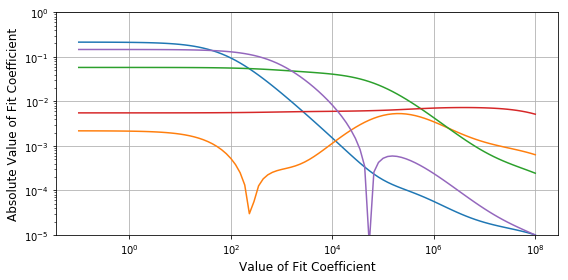

In [14]:
for row in coefs:
    plt.plot(alphas, np.abs(row))
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.ylabel("Absolute Value of Fit Coefficient", fontsize=12)
plt.xlabel("Value of Fit Coefficient", fontsize=12)
#plt.plot([6000,6000],[.00001,1],ls=":",c="k")
plt.ylim([.00001,1])

fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("car-mpg-ridge-coef-plot.pdf")

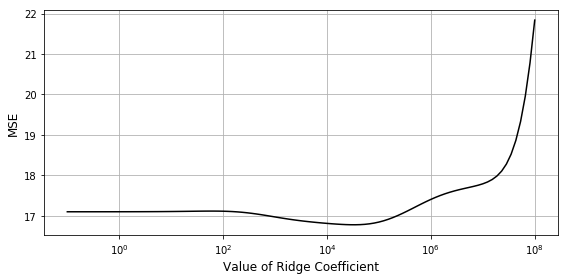

In [15]:
plt.plot(alphas,errs,c="k")
plt.xscale("log")
plt.grid()
plt.xlabel("Value of Ridge Coefficient",fontsize="12")
plt.ylabel("MSE",fontsize="12")
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("car-mpg-ridge-MSE-plot.pdf")